In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import GRU,LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [2]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [3]:
df=df[df['location']=='Argentina']
df=df[['date','new_cases']]

In [4]:
df

,date,new_cases
1632,2020-02-11,NaN
1633,2020-02-12,NaN
1634,2020-02-13,NaN
1635,2020-02-14,NaN
1636,2020-02-15,NaN
...,...,...
1873,2020-10-09,15454.0
1874,2020-10-10,15099.0
1875,2020-10-11,12428.0
1876,2020-10-12,10310.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


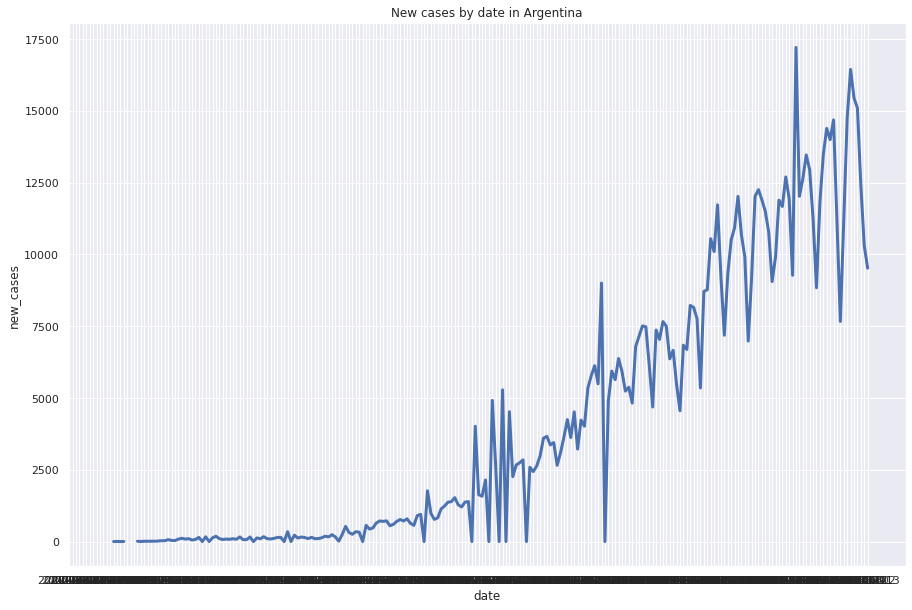

In [6]:
# plt.figure(figsize=(18,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in Argentina')
plt.show()

#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()


# **Data Preprocessing:**

In [7]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [8]:
case_series=case_series.fillna(0)
case_series

,new_cases
1632,0.0
1633,0.0
1634,0.0
1635,0.0
1636,0.0
...,...
1873,15454.0
1874,15099.0
1875,12428.0
1876,10310.0


In [9]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
timestep=8
X_case, y_case = create_dataset(case_series, timestep)


In [11]:
train_size=int(len(case_series)*0.85)

In [12]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [13]:
n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

#x_case_test=x_case_test.reshape((x_case_test.shape[0], x_case_test.shape[1], n_features))


## **Model preperation:**

In [14]:

model = Sequential()
model.add((GRU(50,return_sequences=True,activation='relu', 
               input_shape=(timestep, n_features))))
model.add((GRU(20,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=600, verbose=2)

Epoch 1/600
7/7 - 0s - loss: 19506596.0000
Epoch 2/600
7/7 - 0s - loss: 19183080.0000
Epoch 3/600
7/7 - 0s - loss: 19092846.0000
Epoch 4/600
7/7 - 0s - loss: 18981452.0000
Epoch 5/600
7/7 - 0s - loss: 18845658.0000
Epoch 6/600
7/7 - 0s - loss: 18696342.0000
Epoch 7/600
7/7 - 0s - loss: 18442254.0000
Epoch 8/600
7/7 - 0s - loss: 17589822.0000
Epoch 9/600
7/7 - 0s - loss: 15777591.0000
Epoch 10/600
7/7 - 0s - loss: 10491462.0000
Epoch 11/600
7/7 - 0s - loss: 3546930.2500
Epoch 12/600
7/7 - 0s - loss: 3200397.2500
Epoch 13/600
7/7 - 0s - loss: 2594736.0000
Epoch 14/600
7/7 - 0s - loss: 1240736.8750
Epoch 15/600
7/7 - 0s - loss: 1057468.5000
Epoch 16/600
7/7 - 0s - loss: 1002082.6250
Epoch 17/600
7/7 - 0s - loss: 1043773.3750
Epoch 18/600
7/7 - 0s - loss: 1130990.1250
Epoch 19/600
7/7 - 0s - loss: 1094626.5000
Epoch 20/600
7/7 - 0s - loss: 1081570.0000
Epoch 21/600
7/7 - 0s - loss: 1092739.2500
Epoch 22/600
7/7 - 0s - loss: 1069149.3750
Epoch 23/600
7/7 - 0s - loss: 1041062.9375
Epoch 24/6

# **Check validation data:**

In [15]:

case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size-15:(train_size+timestep-15)])

x_input=numpy.array(x_input)



In [16]:
x_input

array([ 8159.,  7759.,  5352.,  8713.,  8771., 10550., 10104., 11730.],
      dtype=float32)

In [17]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[9551.012]
1 day input [ 7759.     5352.     8713.     8771.    10550.    10104.    11730.
  9551.012]
[ 7759.     5352.     8713.     8771.    10550.    10104.    11730.
  9551.012]
[[[ 7759.   ]
  [ 5352.   ]
  [ 8713.   ]
  [ 8771.   ]
  [10550.   ]
  [10104.   ]
  [11730.   ]
  [ 9551.012]]]
1 day output [[8826.144]]
2 day input [ 5352.     8713.     8771.    10550.    10104.    11730.     9551.012
  8826.144]
[ 5352.     8713.     8771.    10550.    10104.    11730.     9551.012
  8826.144]
[[[ 5352.   ]
  [ 8713.   ]
  [ 8771.   ]
  [10550.   ]
  [10104.   ]
  [11730.   ]
  [ 9551.012]
  [ 8826.144]]]
2 day output [[9128.627]]
3 day input [ 8713.     8771.    10550.    10104.    11730.     9551.012  8826.144
  9128.627]
[ 8713.     8771.    10550.    10104.    11730.     9551.012  8826.144
  9128.627]
[[[ 8713.   ]
  [ 8771.   ]
  [10550.   ]
  [10104.   ]
  [11730.   ]
  [ 9551.012]
  [ 8826.144]
  [ 9128.627]]]
3 day output [[9979.697]]
4 day input [ 8771.    10550.    10104.  

In [18]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [19]:
lst_output=numpy.array(lst_output)
lst_output

array([ 9551.012,  8826.144,  9128.627,  9979.697, 10814.337, 11037.321,
       11479.631, 10580.584,  9852.058, 10367.172, 10947.021, 11518.713,
       11764.226, 11963.605, 11140.419, 10828.527, 11439.603, 11960.691,
       12348.203, 12546.356, 12695.361, 12013.969, 12215.331, 12579.211,
       13002.769, 13302.593, 13490.711, 13639.867, 13502.188, 13548.12 ,
       13811.617, 14148.583, 14432.708, 14627.005, 14786.367, 14863.793,
       14953.221], dtype=float32)

No handles with labels found to put in legend.


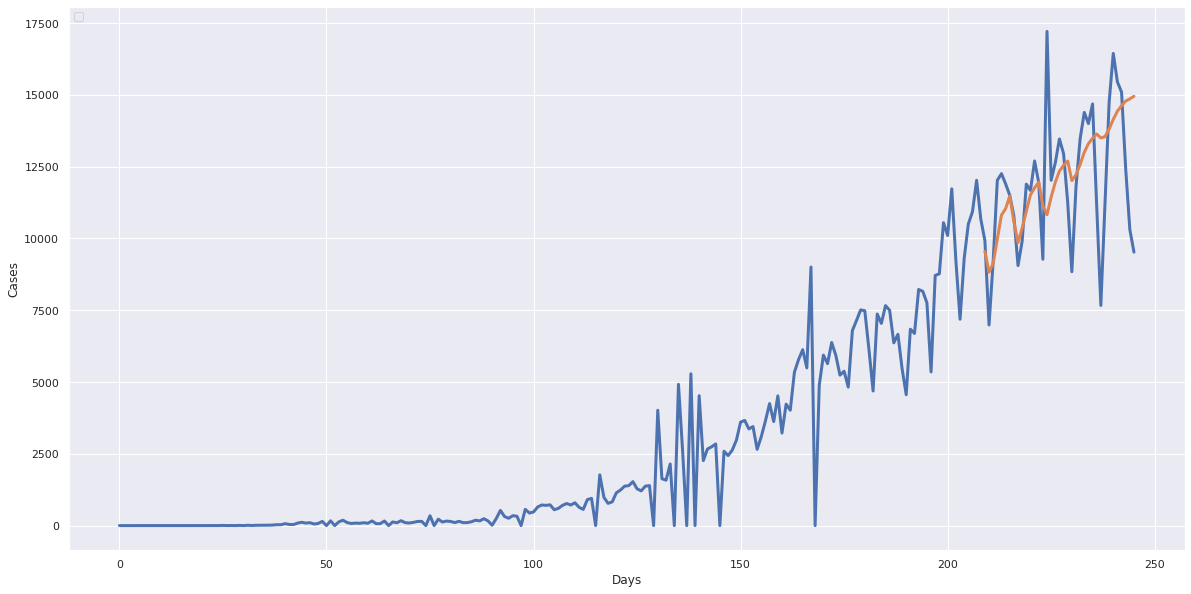

In [20]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting:

---



---

`

In [21]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [22]:

x_input

array([11242., 14740., 16447., 15454., 15099., 12428., 10310.,  9524.],
      dtype=float32)

In [23]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[14029.37]
1 day input [14740.   16447.   15454.   15099.   12428.   10310.    9524.   14029.37]
[14740.   16447.   15454.   15099.   12428.   10310.    9524.   14029.37]
[[[14740.  ]
  [16447.  ]
  [15454.  ]
  [15099.  ]
  [12428.  ]
  [10310.  ]
  [ 9524.  ]
  [14029.37]]]
1 day output [[15943.407]]
2 day input [16447.    15454.    15099.    12428.    10310.     9524.    14029.37
 15943.407]
[16447.    15454.    15099.    12428.    10310.     9524.    14029.37
 15943.407]
[[[16447.   ]
  [15454.   ]
  [15099.   ]
  [12428.   ]
  [10310.   ]
  [ 9524.   ]
  [14029.37 ]
  [15943.407]]]
2 day output [[16829.95]]
3 day input [15454.    15099.    12428.    10310.     9524.    14029.37  15943.407
 16829.95 ]
[15454.    15099.    12428.    10310.     9524.    14029.37  15943.407
 16829.95 ]
[[[15454.   ]
  [15099.   ]
  [12428.   ]
  [10310.   ]
  [ 9524.   ]
  [14029.37 ]
  [15943.407]
  [16829.95 ]]]
3 day output [[15752.672]]
4 day input [15099.    12428.    10310.     9524.    14029.37

In [24]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


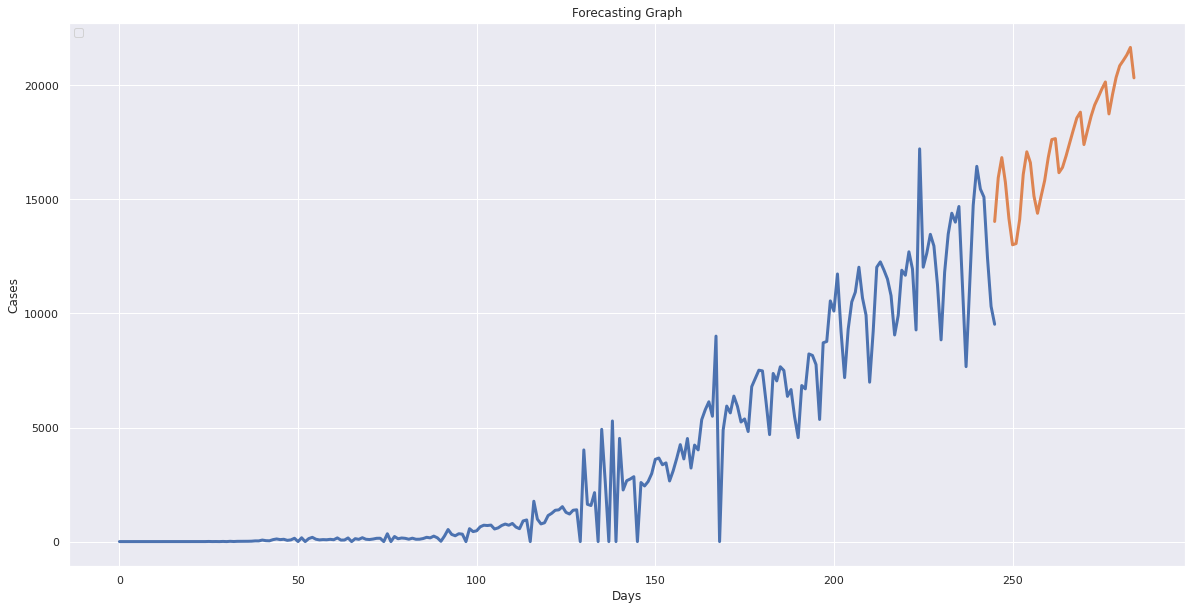

In [25]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()